In [1]:
from lab5 import Image

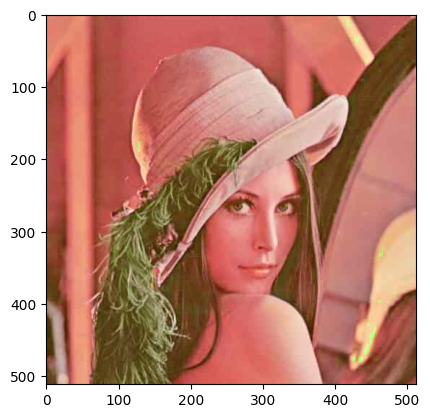

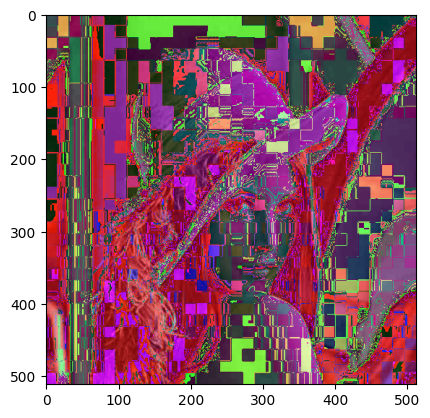

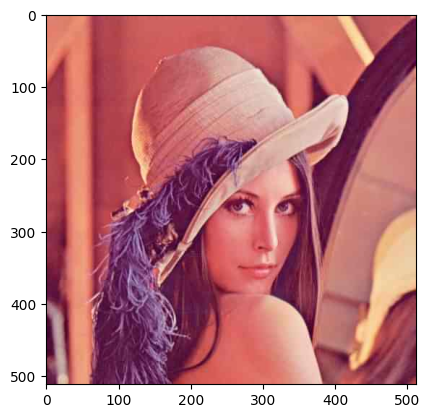

In [2]:
lena = Image('lena.jpg')

# rgb to hsv & hsv to rgb
hsv = lena.to_hsv()
hsv.to_rgb().show_img()

# rgb to hsi & hsi to rgb
hsi = lena.to_hsi()
hsi.to_rgb().show_img()

# rgb to hsl & hsl to rgb
hsl = lena.to_hsl()
hsl.to_rgb().show_img()

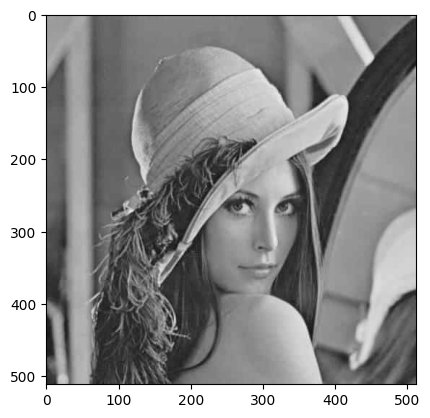

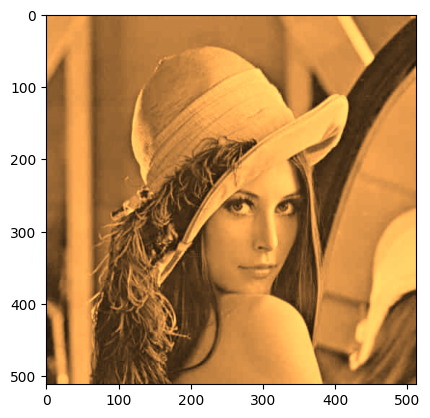

In [3]:
# grayscale & grayscale to rgb
# samo grayscale zwraca pojedynczą warstwę
gray = lena.to_gray(high_contrast=True)
gray.to_rgb().show_img()

sepia = lena.to_sepia(alpha_beta=(1.5, 0.5))
sepia.show_img()

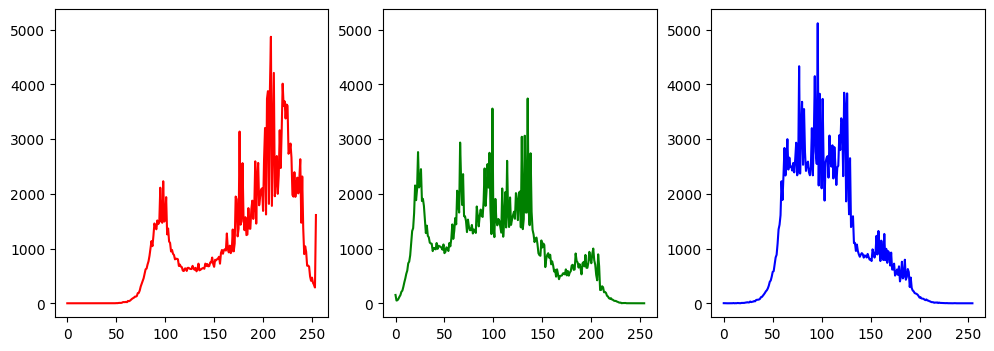

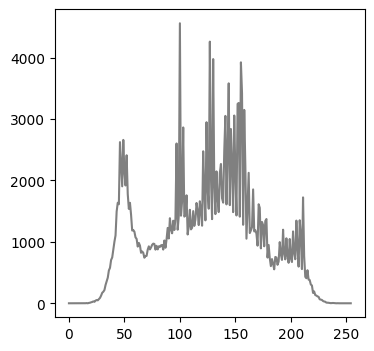

0.0
3614.8828125
689588256.6289062
26260.012502451445


In [4]:
from lab5 import ImageDiffMethod as Dm


# test histogram & plot
lena: Image = Image('lena.jpg')
lena.histogram().plot()

# lena to grayscale & histogram
gray = lena.to_gray()
img = Image.__new__(Image)
img.data, img.color_model = gray.data, gray.color_model
img.histogram().plot()

# compare img to img
print(img.compare_to(img))

# img2 to grayscale & compare to img
img2: Image = Image("lena - Copy.jpg")
gray = img2.to_gray()
img2.data, img2.color_model = gray.data, gray.color_model
print(img2.compare_to(img))

# img3 to grayscale & compare to img
img3: Image = Image("Screenshot.jpg")
gray = img3.to_gray()
img3.data, img3.color_model = gray.data, gray.color_model
print(img3.compare_to(img))
print(img3.compare_to(img, method = Dm.rmse))

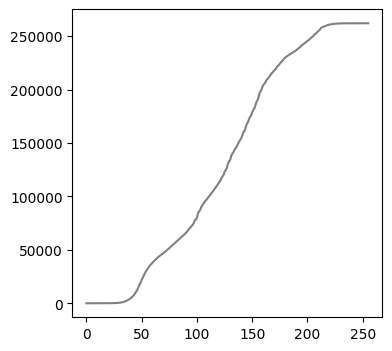

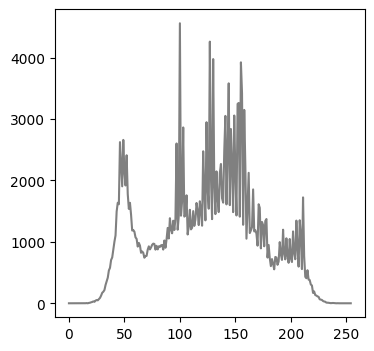

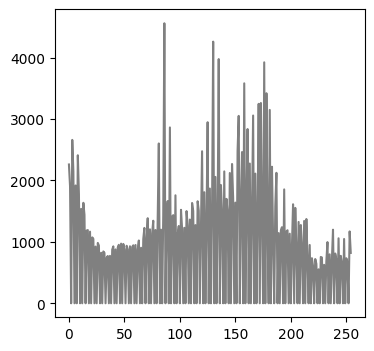

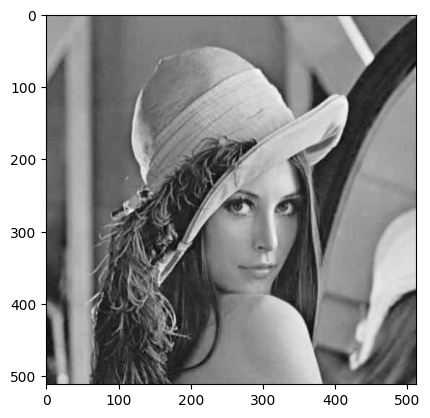

In [5]:
# lena to grayscale
img.data, img.color_model = lena.to_gray().data, lena.to_gray().color_model

# lena to cumulated histogram
hist = img.histogram().to_cumulated()
hist.plot()

# lena aligned
img.histogram().plot()
img.data = img.align_image().data
img.histogram().plot()
img.show_img()

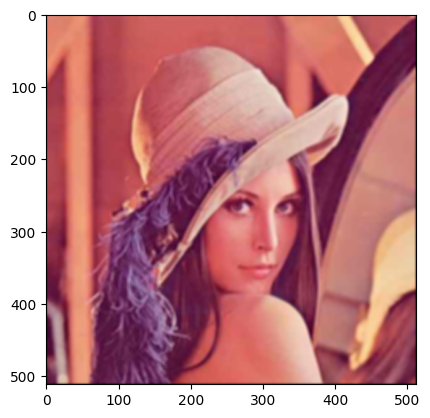

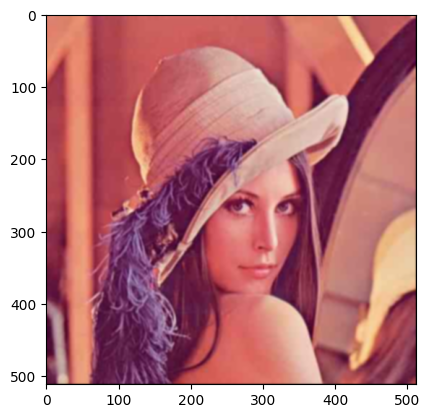

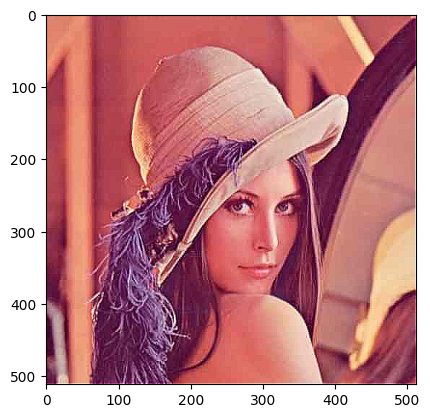

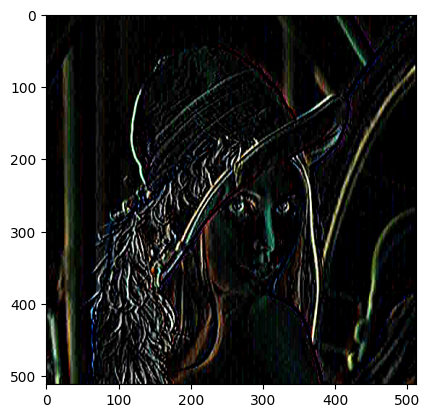

In [6]:
import numpy as np


blur = np.ones((5,5))

gaussian_blur = np.array(
    [[1, 4, 6, 2, 1],
     [4, 16, 24, 16, 4],
     [6, 24, 36, 24, 6],
     [4, 16, 24, 16, 4],
     [1, 4, 6, 4, 1]]
)

sharpen = np.array(
    [[0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]]
)

edges_0 = np.array(
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]]
)

outline = np.array(
    [[-1, -1, -1],
     [-1, 8, -1],
     [-1, -1, -1]]
)

Image.conv_2d(lena, blur, 0.04).show_img()
Image.conv_2d(lena, gaussian_blur, 1/2**8).show_img()
Image.conv_2d(lena, sharpen).show_img()
Image.conv_2d(lena, edges_0).show_img() # ok
